# Simple test case with N halos

In [1]:
import numpy as np
import os

In [2]:
import beorn
from beorn import run

### Let's create fake halo catalogs containing 100 halos with final masses Mh=1e12 at z =6 and growing exponentially

In [5]:
def exp_mar(z,M0=1e12,z0=6):
    return M0*np.exp(-0.79*(z-z0))

In [6]:
halo_catalog_dir = './fake_halo_catalogs/'
halo_catalog_name = 'halo_dict_z'
if not os.path.exists(halo_catalog_dir):
    os.mkdir(halo_catalog_dir)
z_array = np.flip(np.arange(6,25,0.5))
Lbox  = 100 # cMpc/h
Ncell = 128 # (128)**3 grid cells

In [7]:
### create halo catalogs dictionnaries at each redshift and store them.

nbr_halos = 100
Mh_z6 = np.full(nbr_halos,1e12)
z0=6
Z = np.random.rand(nbr_halos)*Lbox  
Y = np.random.rand(nbr_halos)*Lbox  
X = np.random.rand(nbr_halos)*Lbox  

print('Creating fake halo catalogs with',nbr_halos,'halos distributed randomly in the box.',\
      'They have final masses ',Mh_z6,'at z =',z0,'and grow exponentially.')

for zi in z_array:
    h_dict={}
    h_dict['M'] = exp_mar(zi,M0=Mh_z6,z0=z0)
    h_dict['z'] = zi
    h_dict['Lbox'] = Lbox
    h_dict['X'] = X
    h_dict['Y'] = Y
    h_dict['Z'] = Z
    
    save_f(file=halo_catalog_dir + halo_catalog_name + z_string_format(zi),obj=h_dict)
    

Creating fake halo catalogs with 100 halos distributed randomly in the box. They have final masses  [1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12
 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12
 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12
 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12
 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12
 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12
 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12
 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12
 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12
 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12] at z = 6 and grow exponentially.


In [8]:
print('Fake halo catalogs produced. They are stored here:', halo_catalog_dir)

Fake halo catalogs produced. They are stored here: ./fake_halo_catalogs/


### Source model.  Let's pick a flat fstar

In [9]:
param = beorn.par()

# Halo Mass bins
param.sim.Mh_bin_min = 1e7
param.sim.Mh_bin_max = 1e15
param.sim.binn = 40  # nbr of halo mass bin

# name your simulation
param.sim.model_name = '4_halos_with_PBC'
# Nbr of cores to use
param.sim.cores = 1  

# simulation redshifts
param.solver.Nz = z_array

# cosmo
param.cosmo.Om = 0.31
param.cosmo.Ob = 0.045
param.cosmo.Ol = 0.69
param.cosmo.h = 0.68

# Source parameters
# lyman-alpha 
param.source.N_al = 9690*10  # 1500
param.source.alS_lyal = 0.0
# ion
param.source.Nion = 5000 * 3 
# xray
param.source.E_min_xray = 500
param.source.E_max_xray = 2000
param.source.E_min_sed_xray = 500
param.source.E_max_sed_xray = 2000
param.source.alS_xray = 1.5
param.source.cX = 3.4e40 * 3

# fesc
param.source.f0_esc = 0.2
param.source.pl_esc = 0

# fstar
param.source.f_st = 1
param.source.g1 = 0
param.source.g2 = 0
param.source.g3 = 4
param.source.g4 = -1
param.source.Mp = 1.6e11 * param.cosmo.h
param.source.Mt = 1e7

# Minimum star forming halo
param.source.M_min = 1e5

# Mass Accretion Rate model (EXP or EPS)
param.source.MAR = 'EXP'

In [10]:
run.compute_profiles(param)

Computing Temperature (Tk), Lyman-α and ionisation fraction (xHII) profiles...
param.solver.Nz is given as a np array.
param.solver.fXh is set to constant. We will assume f_X,h = 2e-4**0.225
...  Profiles stored in dir ./profiles.
 
It took 00:00:27 to compute the profiles.


z, Mh =  13.0 , 7.39e+08
z, Mh =  10.0 , 7.90e+09
z, Mh =  8.0 , 3.84e+10


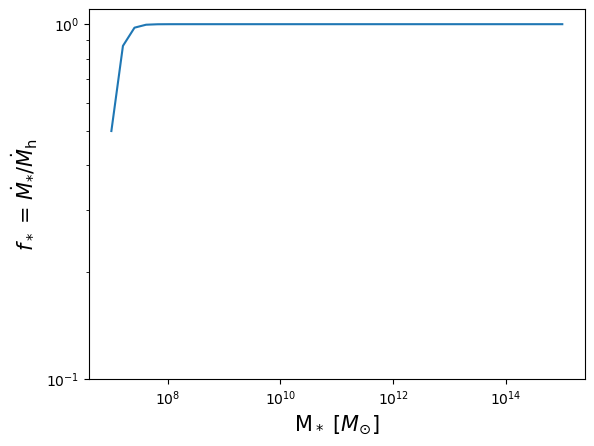

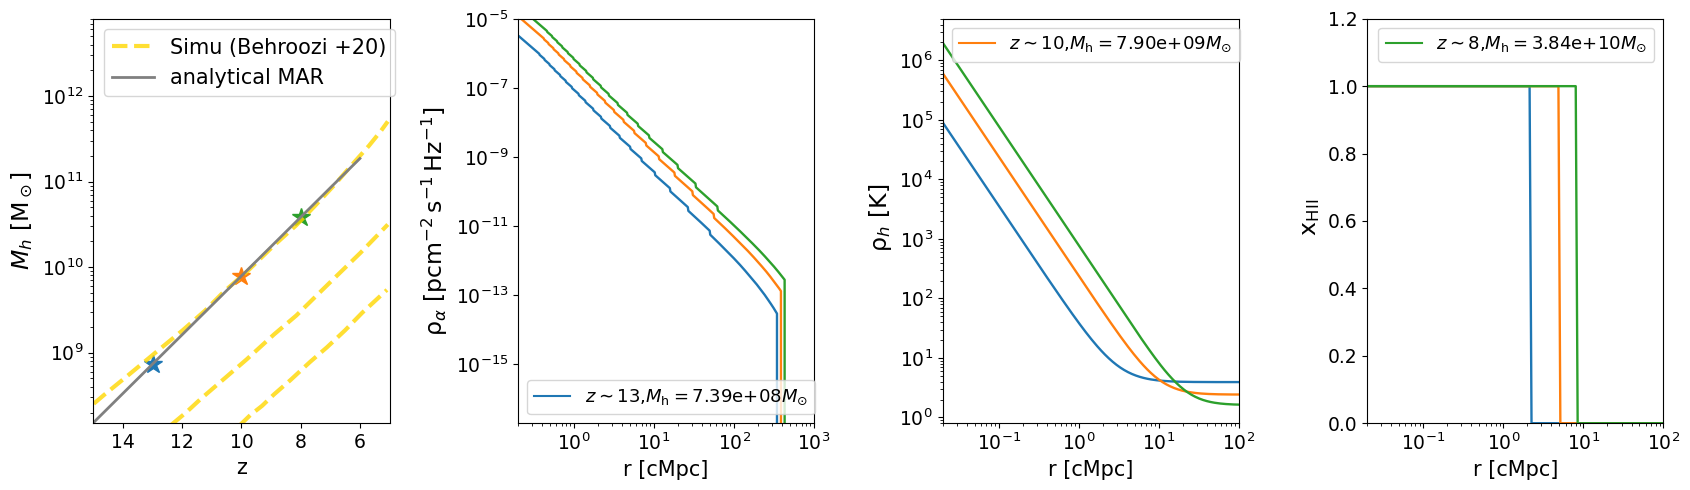

In [12]:
from beorn.astro import f_star_Halo
profiles = load_f('./profiles/4_halos_with_PBC.pkl')
ind_M = 20
plt.loglog(profiles.M_Bin,f_star_Halo(param,profiles.M_Bin))
plt.ylim(0.1,1.1)
plt.ylabel(r'$f_*$ = $\dot{M}_{*}/\dot{M}_{\mathrm{h}}  $', fontsize=15)
plt.xlabel('M$_*$ $[M_{\odot}]$', fontsize=15)

plot_1D_profiles(param,profiles,ind_M,z_liste=[13,10,8])

## Estimate Tk, xHII, dTb quickly to recalibrate the model parameters

In [13]:
param.sim.Lbox  = Lbox
param.sim.Ncell = Ncell
param.sim.halo_catalogs = halo_catalog_dir+halo_catalog_name  ## path to dir with halo catalogs + filename
param.sim.dens_field  = None
param.sim.store_grids = True 

# define k bins for PS measurement
kmin = 1 / Lbox
kmax = Ncell / Lbox
kbin = int(6 * np.log10(kmax / kmin))
param.sim.kmin = kmin
param.sim.kmax = kmax
param.sim.kbin = kbin


In [14]:
# Quick calculation of the global quantities from the distribution of halos and the 1D profiles (similar to eq 11 in 2302.06626)
GS = beorn.compute_glob_qty(param)
save_f(file='./physics/GS_approx_' + param.sim.model_name + '.pkl',obj = GS)


Computing global quantities (sfrd, Tk, xHII, dTb, xal, xcoll) from 1D profiles and halo catalogs....
param.solver.Nz is given as a np array.
....done. Returns a dictionnary.


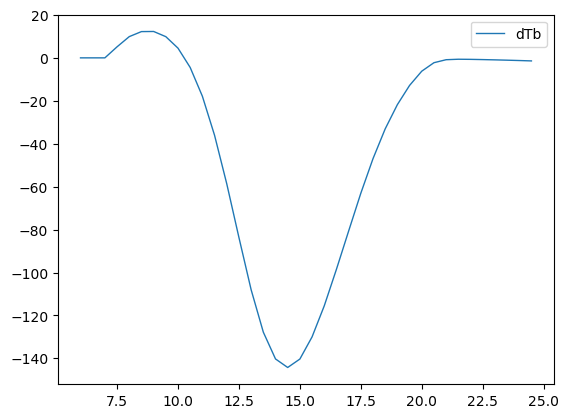

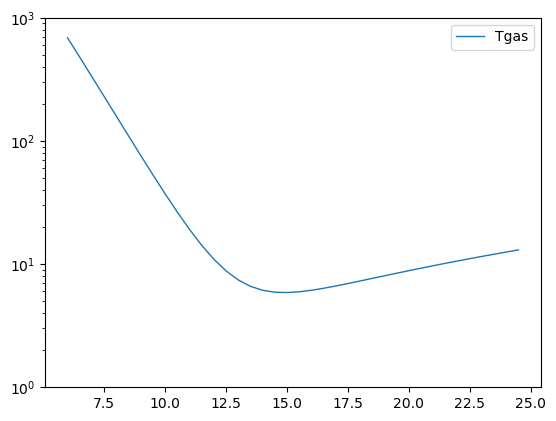

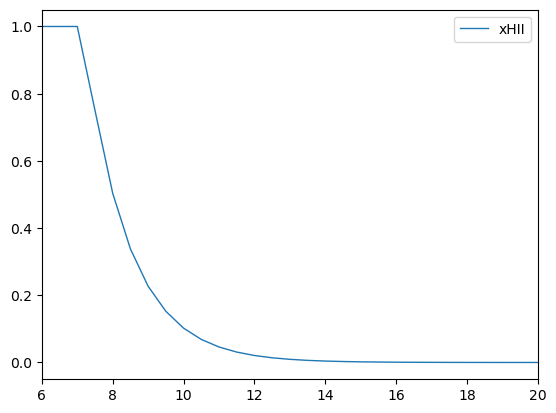

In [15]:
GS_approx = load_f('./physics/GS_approx'+'_' + param.sim.model_name + '.pkl')
plot_Beorn(GS_approx, qty='dTb', xlim=None, ylim=None, label='dTb', color='C0', ls='-', lw=1, alpha=1)
plt.show()
plot_Beorn(GS_approx, qty='Tk', xlim=None, ylim=None, label='Tgas', color='C0', ls='-', lw=1, alpha=1)
plt.semilogy()
plt.ylim(1,1e3)
plt.show()
plot_Beorn(GS_approx, qty='x_HII', xlim=(6,20), ylim=None, label='xHII', color='C0', ls='-', lw=1, alpha=1)


## Paint profiles on 3D grids. We assume constant density i.e. "param.sim.dens_field" is None

In [18]:
paint_boxes(param, 
            RSD=False, 
            ion=True, 
            temp=True, 
            dTb=True, 
            lyal=True, 
            check_exists=False,
            cross_corr=False,
           )


Painting profiles on a grid with 128 pixels per dim. Box size is 100 cMpc/h.
param.solver.Nz is given as a np array.
Core nbr 0 is taking care of z =  24.5
----- Painting 3D map for z = 24.5 -------
no density field provided. Return 0 for delta_b.
There are 100 halos at z= 24.5
Looping over halo mass bins and painting profiles on 3D grid .... 
Quick calculation from the profiles predicts xHII =  0.0
100 halos in mass bin  24 . It took 00:00:01 to paint the profiles.
.... Done painting profiles. 
Dealing with the overlap of ionised bubbles.... 
initial sum of ionized fraction : 0.0
Universe not fully ionized : xHII is 0.0
1 connected regions.
there are  0 connected regions with less than  10.0  pixels. They contain a fraction  nan of the total ionisation fraction.
final xion sum:  0.0
.... Done. It took: 00:00:00 to redistribute excess photons from the overlapping regions.
--- Including Salpha fluctuations in dTb ---
--- Including xcoll fluctuations in dTb ---
----- Snapshot at z =  24.

----- Snapshot at z =  20.5  is done -------
 
Core nbr 0 is taking care of z =  20.0
----- Painting 3D map for z = 20.0 -------
no density field provided. Return 0 for delta_b.
There are 100 halos at z= 20.0
Looping over halo mass bins and painting profiles on 3D grid .... 
Quick calculation from the profiles predicts xHII =  0.0
100 halos in mass bin  24 . It took 00:00:01 to paint the profiles.
.... Done painting profiles. 
Dealing with the overlap of ionised bubbles.... 
initial sum of ionized fraction : 38.862
Universe not fully ionized : xHII is 0.0
1 connected regions.
there are  0 connected regions with less than  10.0  pixels. They contain a fraction  0.0 of the total ionisation fraction.
final xion sum:  38.862
.... Done. It took: 00:00:00 to redistribute excess photons from the overlapping regions.
--- Including Salpha fluctuations in dTb ---
--- Including xcoll fluctuations in dTb ---
----- Snapshot at z =  20.0  is done -------
 
Core nbr 0 is taking care of z =  19.5
----

--- Including xcoll fluctuations in dTb ---
----- Snapshot at z =  16.0  is done -------
 
Core nbr 0 is taking care of z =  15.5
----- Painting 3D map for z = 15.5 -------
no density field provided. Return 0 for delta_b.
There are 100 halos at z= 15.5
Looping over halo mass bins and painting profiles on 3D grid .... 
Quick calculation from the profiles predicts xHII =  0.0013
100 halos in mass bin  24 . It took 00:00:01 to paint the profiles.
.... Done painting profiles. 
Dealing with the overlap of ionised bubbles.... 
initial sum of ionized fraction : 2899.859
Universe not fully ionized : xHII is 0.0014
3 connected regions.
there are  2 connected regions with less than  10.0  pixels. They contain a fraction  0.0028 of the total ionisation fraction.
final xion sum:  2899.859
.... Done. It took: 00:00:00 to redistribute excess photons from the overlapping regions.
--- Including Salpha fluctuations in dTb ---
--- Including xcoll fluctuations in dTb ---
----- Snapshot at z =  15.5  is d

----- Snapshot at z =  11.5  is done -------
 
Core nbr 0 is taking care of z =  11.0
----- Painting 3D map for z = 11.0 -------
no density field provided. Return 0 for delta_b.
There are 100 halos at z= 11.0
Looping over halo mass bins and painting profiles on 3D grid .... 
Quick calculation from the profiles predicts xHII =  0.0461
100 halos in mass bin  24 . It took 00:00:01 to paint the profiles.
.... Done painting profiles. 
Dealing with the overlap of ionised bubbles.... 
initial sum of ionized fraction : 111452.682
Universe not fully ionized : xHII is 0.0531
95 connected regions.
there are  0 connected regions with less than  10.0  pixels. They contain a fraction  0.0 of the total ionisation fraction.
final xion sum:  111452.682
.... Done. It took: 00:00:01 to redistribute excess photons from the overlapping regions.
--- Including Salpha fluctuations in dTb ---
--- Including xcoll fluctuations in dTb ---
----- Snapshot at z =  11.0  is done -------
 
Core nbr 0 is taking care of

100 halos in mass bin  24 . It took 00:00:01 to paint the profiles.
.... Done painting profiles. 
Dealing with the overlap of ionised bubbles.... 
.... Done. It took: 00:00:00 to redistribute excess photons from the overlapping regions.
universe is fully inoinzed. Return [1] for Grid_xHII.
--- Including Salpha fluctuations in dTb ---
--- Including xcoll fluctuations in dTb ---
----- Snapshot at z =  6.5  is done -------
 
Core nbr 0 is taking care of z =  6.0
----- Painting 3D map for z = 6.0 -------
no density field provided. Return 0 for delta_b.
There are 100 halos at z= 6.0
Looping over halo mass bins and painting profiles on 3D grid .... 
Quick calculation from the profiles predicts xHII =  1.0
100 halos in mass bin  24 . It took 00:00:01 to paint the profiles.
.... Done painting profiles. 
Dealing with the overlap of ionised bubbles.... 
.... Done. It took: 00:00:00 to redistribute excess photons from the overlapping regions.
universe is fully inoinzed. Return [1] for Grid_xHII.


Ncell is  128
Ncell is  128


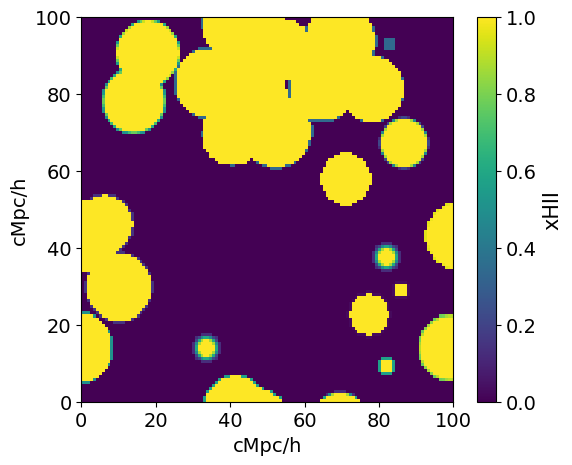

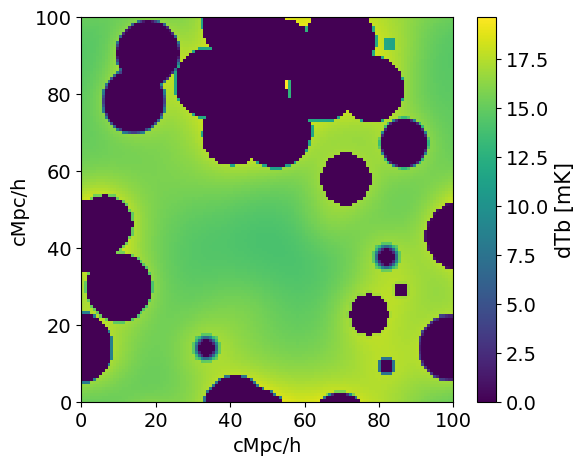

In [24]:
zz = 9
xHII_grid = load_grid(param,z=zz,type='bubbles')
plot_2d_map(xHII_grid,100,64, qty='xHII')


dTb_grid = load_grid(param,z=zz,type='dTb')
plot_2d_map(dTb_grid,100,64,scale = 'lin', qty='dTb [mK]')


In [25]:
# Step 3 : gather the GS_PS files at different redshifts and create a single GS_PS.pkl file.
gather_GS_PS_files(param,remove = True)


param.solver.Nz is given as a np array.


## Plot global quantities and power spectra computed from boxes

k RT is 0.11589980128750021 Mpc/h


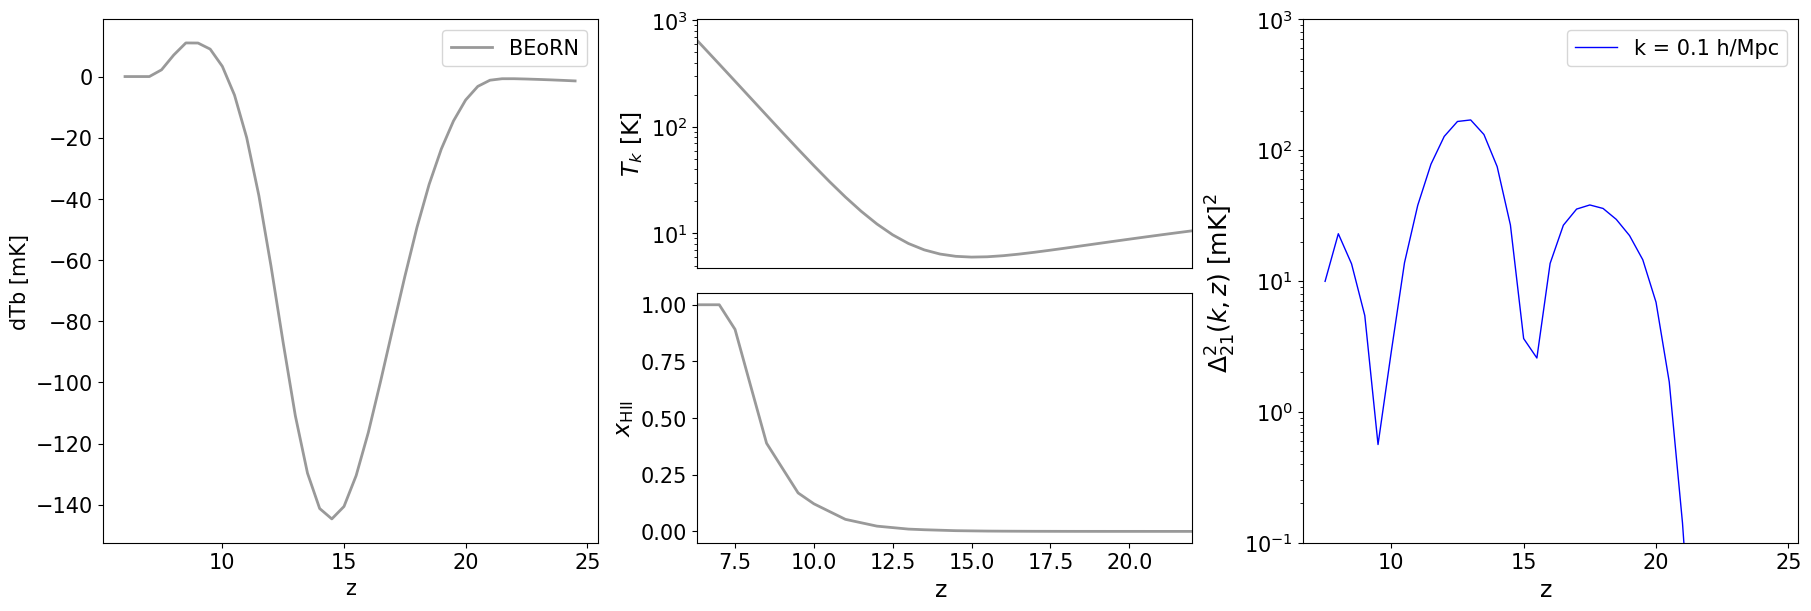

In [26]:
##### Plot the results (dTb, Tk, xHII, PS_dTb(z))
import matplotlib.pyplot as plt
import matplotlib
from beorn.plotting import plot_Beorn_PS_of_z
import matplotlib.gridspec as gridspec
matplotlib.rc('xtick', labelsize=15)
matplotlib.rc('ytick', labelsize=15)
fig = plt.figure(constrained_layout=True)
fig.set_figwidth(18)

fig.set_figheight(6)

gs = gridspec.GridSpec(2, 3, figure=fig)

ax1 = fig.add_subplot(gs[:,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,1],sharex=ax2)
ax4 = fig.add_subplot(gs[:,2])
    
    

GS_PS = load_f('./physics/GS_PS_' + str(param.sim.Ncell) + '_' + param.sim.model_name + '.pkl')
#GS_approx = load_f('./physics/GS_approx'+'_' + param.sim.model_name + '.pkl')

ax1.plot(GS_PS['z'],GS_PS['dTb'],lw=2,alpha=0.8,ls='-',color='gray',label='BEoRN')
#ax1.plot(GS_approx['z'],GS_approx['dTb'],ls='--',label='')
ax1.legend(fontsize=15,loc='upper right')
#ax1.set_xlim(6,20)
#ax1.set_ylim(-62,13)
ax1.set_xlabel('z',fontsize=15)
ax1.set_ylabel('dTb [mK]',fontsize=15)



ax2.plot(GS_PS['z'],GS_PS['Tk'],lw=2,alpha=0.8,ls='-',color='gray',label='BEoRN')
#ax2.plot(GS_approx['z'],GS_approx['Tk'],ls='--',color='gray')
ax2.semilogy([],[])
#ax2.set_ylim(1,1e2)
ax2.set_ylabel('$T_{k}$ [K]',fontsize=17)
#plt.show()


ax3.plot(GS_PS['z'],GS_PS['x_HII'],lw=2,alpha=0.8,ls='-',color='gray',label='BEoRN')
#ax3.plot(GS_approx['z'],GS_approx['x_HII'],ls='--',color='gray')
ax3.set_xlim(6.3,22)
ax3.set_ylabel('$x_{\mathrm{HII}}$',fontsize=17)
ax3.set_xlabel('z ',fontsize=17)


plot_Beorn_PS_of_z(0.1, GS_PS, GS_PS,ls='-',lw=1, color='b',RSD = False,label='k = 0.1 h/Mpc',qty='dTb',alpha=1,ax=plt)



ax4.set_ylim(1e-1,1e3)
#ax4.set_xlim(5.8,22)
ax4.set_ylabel('$\Delta_{21}^{2}(k,z)$ [mK]$^{2}$ ',fontsize=18) # k^{3}P(k)/(2\pi^{2})
ax4.set_xlabel('z ',fontsize=17)
ax4.legend(loc='best',fontsize=15)

ax2.axes.get_xaxis().set_visible(False)
plt.show()










## dTb Lightcones

nGrid is 128 . Lbox is 100 Mpc. Plotting lightcone for z = [24.5 24.  23.5 23.  22.5 22.  21.5 21.  20.5 20.  19.5 19.  18.5 18.
 17.5 17.  16.5 16.  15.5 15.  14.5 14.  13.5 13.  12.5 12.  11.5 11.
 10.5 10.   9.5  9.   8.5  8.   7.5  7.   6.5  6. ] and slice nbr 80
Loading boxes...
Generating lightcones...
scale_fac : [0.03921569 0.04       0.04081633 0.04166667 0.04255319 0.04347826
 0.04444444 0.04545455 0.04651163 0.04761905 0.04878049 0.05
 0.05128205 0.05263158 0.05405405 0.05555556 0.05714286 0.05882353
 0.06060606 0.0625     0.06451613 0.06666667 0.06896552 0.07142857
 0.07407407 0.07692308 0.08       0.08333333 0.08695652 0.09090909
 0.0952381  0.1        0.10526316 0.11111111 0.11764706 0.125
 0.13333333 0.14285714] z :  [24.5 24.  23.5 23.  22.5 22.  21.5 21.  20.5 20.  19.5 19.  18.5 18.
 17.5 17.  16.5 16.  15.5 15.  14.5 14.  13.5 13.  12.5 12.  11.5 11.
 10.5 10.   9.5  9.   8.5  8.   7.5  7.   6.5  6. ]
Making lightcone between 0.039216 < z < 0.142703


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 547/547 [00:00<00:00, 4791.86it/s]


...done
Range for Lightcone plot is : -144.63659064171853 10.993406994427023
1


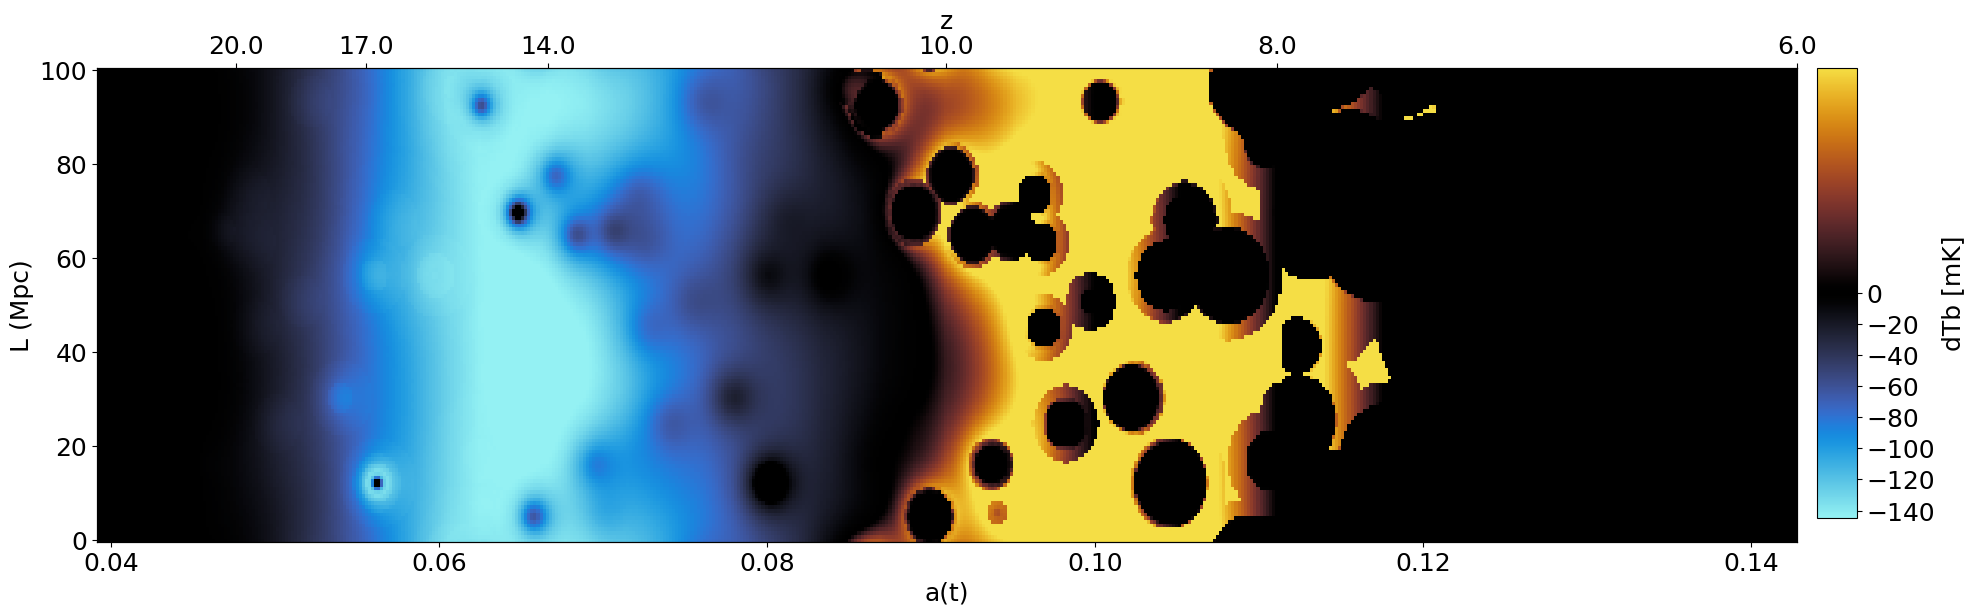

In [28]:
from beorn.lightcones import lightcone 
slice_nbr = 80
lightcone_ = lightcone(param,qty='dTb',slice_nbr = slice_nbr)
lightcone_.load_boxes()
lightcone_.generate_lightcones()
lightcone_.plotting_lightcone()

## xHII Lightcones


nGrid is 128 . Lbox is 100 Mpc. Plotting lightcone for z = [24.5 24.  23.5 23.  22.5 22.  21.5 21.  20.5 20.  19.5 19.  18.5 18.
 17.5 17.  16.5 16.  15.5 15.  14.5 14.  13.5 13.  12.5 12.  11.5 11.
 10.5 10.   9.5  9.   8.5  8.   7.5  7.   6.5  6. ] and slice nbr 80
Loading boxes...
Generating lightcones...
scale_fac : [0.03921569 0.04       0.04081633 0.04166667 0.04255319 0.04347826
 0.04444444 0.04545455 0.04651163 0.04761905 0.04878049 0.05
 0.05128205 0.05263158 0.05405405 0.05555556 0.05714286 0.05882353
 0.06060606 0.0625     0.06451613 0.06666667 0.06896552 0.07142857
 0.07407407 0.07692308 0.08       0.08333333 0.08695652 0.09090909
 0.0952381  0.1        0.10526316 0.11111111 0.11764706 0.125
 0.13333333 0.14285714] z :  [24.5 24.  23.5 23.  22.5 22.  21.5 21.  20.5 20.  19.5 19.  18.5 18.
 17.5 17.  16.5 16.  15.5 15.  14.5 14.  13.5 13.  12.5 12.  11.5 11.
 10.5 10.   9.5  9.   8.5  8.   7.5  7.   6.5  6. ]
Making lightcone between 0.039216 < z < 0.142703


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 547/547 [00:00<00:00, 4945.27it/s]


...done
Range for Lightcone plot is : 0.0 1.0
1


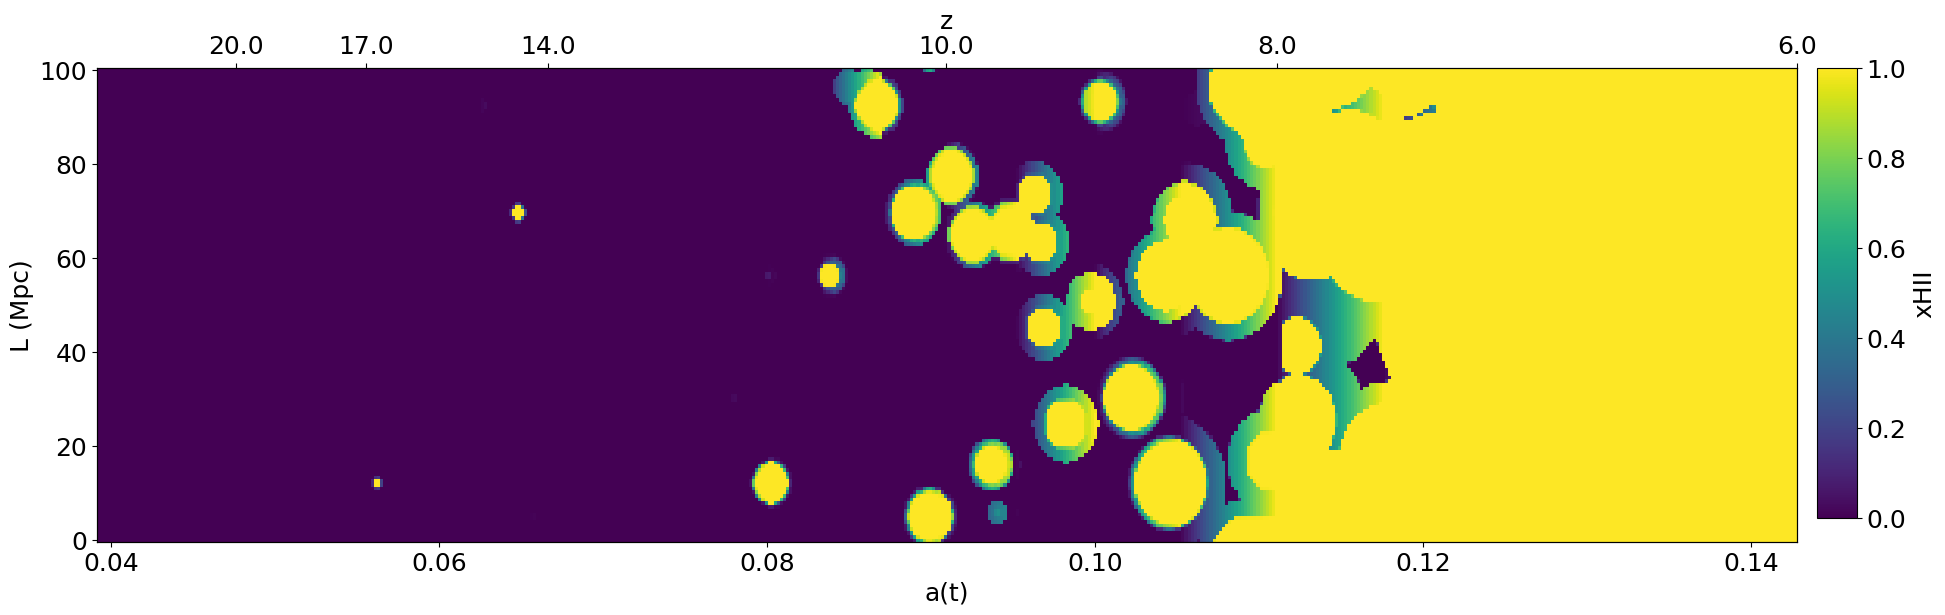

In [29]:
lightcone_ = lightcone(param,qty='bubbles',slice_nbr = slice_nbr)
lightcone_.load_boxes()
lightcone_.generate_lightcones()
lightcone_.plotting_lightcone()
